In [1]:
import pandas as pd
import numpy as np

In [2]:
datos = pd.read_csv("eod_2017_csv/tviaje_eod2017/conjunto_de_datos/tviaje.csv")
catalogo_lugar = pd.read_csv("eod_2017_csv/tviaje_eod2017/catalogos/dto_origen.csv")
distrito_metro = pd.read_csv("Distrito-Metro.csv")
proporciones = pd.read_csv("proporciones.csv")
diccionario = pd.read_csv("dictionary.csv")

In [3]:
datos

,id_via,id_soc,p5_3,n_via,p5_6,p5_7_6,p5_7_7,dto_origen,p5_9_1,p5_9_2,...,p5_27_6,p5_27_7,p5_27_8,estrato,factor,upm_dis,est_dis,tloc,sexo,edad
0,2936,1268,1,1,1,15,9,2,8,0,...,NaN,NaN,NaN,3,244,87,40,1,2,26
1,2937,1268,1,2,3,16,9,16,14,0,...,NaN,NaN,NaN,3,244,87,40,1,2,26
2,2938,1268,2,1,1,15,9,2,17,0,...,NaN,NaN,NaN,3,244,87,40,1,2,26
3,2939,1268,2,2,7,15,9,2,23,0,...,NaN,NaN,NaN,3,244,87,40,1,2,26
4,2940,1269,1,1,1,15,9,2,8,0,...,NaN,NaN,NaN,3,244,87,40,1,2,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531589,530057,199596,1,2,3,12,9,64,13,0,...,NaN,NaN,NaN,2,68,12313,5460,2,1,26
531590,530058,199597,2,1,1,69,13,300,7,0,...,NaN,NaN,NaN,2,68,12313,5460,2,1,51
531591,530059,199597,2,2,4,81,15,166,15,0,...,NaN,NaN,NaN,2,68,12313,5460,2,1,51
531592,530060,199598,2,1,1,69,13,300,14,0,...,NaN,NaN,NaN,2,68,12313,5460,2,2,49


In [4]:
diccionario

,Nombre,Nuevo
0,Acatitla,Acatitla
1,Aculco,Aculco
2,AgrÌcola Oriental,Agrícola Oriental
3,Allende,Allende
4,Apatlaco,Apatlaco
...,...,...
158,Xola,Xola
159,Zapata,Zapata
160,Zapotitl·n,Zapotitlán
161,Zaragoza,Zaragoza


In [5]:
name_mapping = dict(zip(diccionario['Nombre'], diccionario['Nuevo']))

proporciones.replace(name_mapping, inplace=True)

In [6]:
proporciones

,p,q,l,i,j,pi
0,Acatitla,Aculco,8,Chabacano,La Viga,1.0
1,Acatitla,Aculco,8,La Viga,Santa Anita,1.0
2,Acatitla,Aculco,8,Santa Anita,Coyuya,1.0
3,Acatitla,Aculco,8,Coyuya,Iztacalco,1.0
4,Acatitla,Aculco,8,Iztacalco,Apatlaco,1.0
...,...,...,...,...,...,...
322034,Zócalo,Zaragoza,1,San Lázaro,Moctezuma,1.0
322035,Zócalo,Zaragoza,1,Candelaria,San Lázaro,1.0
322036,Zócalo,Zaragoza,1,Merced,Candelaria,1.0
322037,Zócalo,Zaragoza,1,Pino Suárez,Merced,1.0


In [7]:
matrix = pd.pivot_table(proporciones, values='pi', index=['p', 'q'], columns=['l', 'i', 'j'], aggfunc='sum')
matrix = matrix.fillna(0)


In [8]:
matrix

l                                                      1                       \
i                                               Balbuena             Balderas   
j                                 Boulevard Puerto Aéreo Moctezuma Cuauhtémoc   
p        q                                                                      
Acatitla Aculco                                      0.0      0.00        0.0   
         Agrícola Oriental                           0.0      0.00        0.0   
         Allende                                     0.0      0.55        0.0   
         Apatlaco                                    0.0      0.00        0.0   
         Aquiles Serdán                              0.0      0.00        0.0   
...                                                  ...       ...        ...   
Zócalo   Viveros/Derechos Humanos                    0.0      0.00        0.0   
         Xola                                        0.0      0.00        0.0   
         Zapata                                      0.0      0.00        0.0   
         Zapotitlán                                  0.0      0.00        0.0   
         Zaragoza                                    1.0      0.00        0.0   

l                                                                        \
i                                                Boulevard Puerto Aéreo   
j                                 Salto del Agua               Balbuena   
p        q                                                                
Acatitla Aculco                              0.0                   0.00   
         Agrícola Oriental                   0.0                   0.00   
         Allende                             0.0                   0.55   
         Apatlaco                            0.0                   0.00   
         Aquiles Serdán                      0.0                   0.00   
...                                          ...                    ...   
Zócalo   Viveros/Derechos Humanos            0.0                   0.00   
         Xola                                0.0                   0.00   
         Zapata                              0.0                   0.00   
         Zapotitlán                          0.0                   0.00   
         Zaragoza                            0.0                   0.00   

l                                                                             \
i                                          Candelaria            Chapultepec   
j                                 Guerrero     Merced San Lázaro Juanacatlán   
p        q                                                                     
Acatitla Aculco                        0.0       0.00        0.0         0.0   
         Agrícola Oriental             0.0       0.00        0.0         0.0   
         Allende                       0.0       0.55        0.0         0.0   
         Apatlaco                      0.0       0.00        0.0         0.0   
         Aquiles Serdán                0.0       0.00        0.0         0.0   
...                                    ...        ...        ...         ...   
Zócalo   Viveros/Derechos Humanos      0.0       0.00        0.0         0.0   
         Xola                          0.0       0.00        0.0         0.0   
         Zapata                        0.0       0.00        0.0         0.0   
         Zapotitlán                    0.0       0.00        0.0         0.0   
         Zaragoza                      1.0       0.00        1.0         0.0   

l                                          ...            B  \
i                                          ... Romero Rubio   
j                                 Sevilla  ...      Oceanía   
p        q                                 ...                
Acatitla Aculco                       0.0  ...          0.0   
         Agrícola Oriental            0.0  ...          0.0   
         Allende                      0.0  ...          0.0   
         Apatlac

# seleccionamos solo los datos del Metro

In [9]:
datos_metro =datos[datos["p5_14_01"]==1]

In [10]:
#solo las personas de la ciudad de México o del EDOMEX
datos_metro = datos_metro[(datos_metro["p5_12_7"] == 9)]
datos_metro["p5_12_7"]

10        9
11        9
13        9
21        9
62        9
         ..
531152    9
531154    9
531158    9
531161    9
531164    9
Name: p5_12_7, Length: 61772, dtype: int64

In [11]:
datos_metro = datos_metro[(datos_metro["p5_9_1"]>5) & (datos_metro["p5_9_1"]<12)]

In [12]:
datos_metro

,id_via,id_soc,p5_3,n_via,p5_6,p5_7_6,p5_7_7,dto_origen,p5_9_1,p5_9_2,...,p5_27_6,p5_27_7,p5_27_8,estrato,factor,upm_dis,est_dis,tloc,sexo,edad
10,2946,1270,1,3,1,15,9,2,8,0,...,NaN,NaN,NaN,3,236,88,40,1,1,64
11,2947,1270,1,4,6,5,9,25,10,0,...,NaN,NaN,NaN,3,236,88,40,1,1,64
62,2998,1285,1,1,1,15,9,2,8,0,...,2.0,2.0,2.0,3,39,89,40,1,1,54
64,3000,1286,1,1,1,15,9,2,8,0,...,NaN,NaN,NaN,3,39,89,40,1,2,52
69,3005,1288,1,1,1,15,9,2,8,0,...,NaN,NaN,NaN,3,39,89,40,1,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530876,531464,200083,1,1,1,69,13,300,8,20,...,2.0,2.0,2.0,2,57,12350,5470,3,2,36
530966,531554,200105,2,1,1,69,13,300,11,31,...,NaN,NaN,NaN,2,57,12351,5470,3,2,56
531158,529626,199458,2,1,1,69,13,300,8,0,...,NaN,NaN,NaN,2,125,12306,5460,2,1,33
531161,529629,199459,2,1,1,69,13,300,8,0,...,NaN,NaN,NaN,2,125,12306,5460,2,2,36


In [13]:
datos_metro["dto_origen"]

10          2
11         25
62          2
64          2
69          2
         ... 
530876    300
530966    300
531158    300
531161    300
531164    300
Name: dto_origen, Length: 24634, dtype: int64

In [14]:
catalogo_lugar

,cve,descrip
0,1,Centro Histórico
1,2,Buenavista-Reforma
2,3,Tlatelolco
3,4,Morelos
4,5,Moctezuma
...,...,...
295,207,Tramo Amecameca-Cuautla
296,207,Tramo Amecameca-Cuautla
297,300,Tizayuca
298,888,Fuera de la ZMVM


In [15]:
merged_df = pd.merge(datos_metro, catalogo_lugar, left_on='dto_origen', right_on='cve', how='left')
merged_df['origen'] = merged_df['descrip'].where(~merged_df['descrip'].isna(), other='No match found')

merged_df2 = pd.merge(datos_metro, catalogo_lugar, left_on='dto_dest', right_on='cve', how='left')
merged_df['destino'] = merged_df2['descrip'].where(~merged_df['descrip'].isna(), other='No match found')


In [16]:
merged_df[["origen",'destino']]


,origen,destino
0,Buenavista-Reforma,Nueva Industrial Vallejo
1,Nueva Industrial Vallejo,Buenavista-Reforma
2,Buenavista-Reforma,Morelos
3,Buenavista-Reforma,Tlatelolco
4,Buenavista-Reforma,Tlatelolco
...,...,...
36433,Tizayuca,NaN
36434,Tizayuca,NaN
36435,Tizayuca,NaN
36436,Tizayuca,NaN


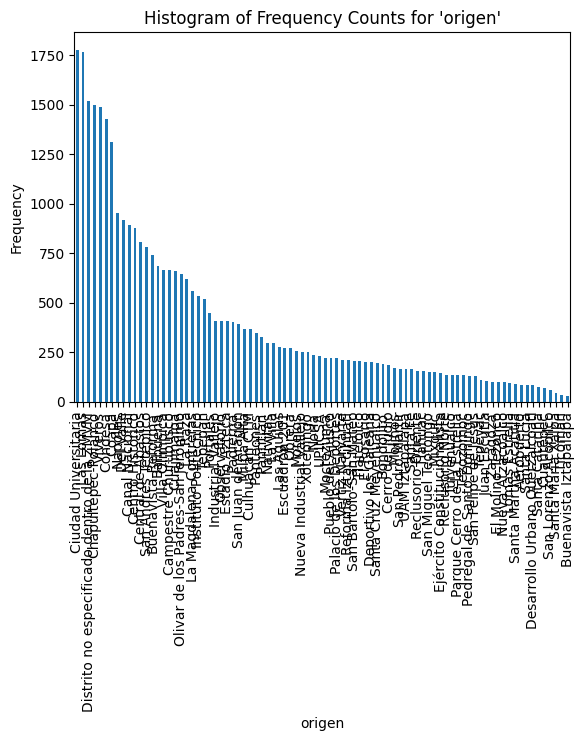

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame
# Calculate frequency counts
frequency_counts = merged_df["destino"].value_counts()

# Plot histogram of frequencies with category names on the x-axis
frequency_counts.plot(kind='bar', title="Histogram of Frequency Counts for 'origen'", xlabel="origen", ylabel="Frequency")
plt.show()

In [18]:
# Calculate the number of different types of values in the "origen" column
num_unique_origen = merged_df['destino'].nunique()
print("Number of different types of values in 'origen':", num_unique_origen)


Number of different types of values in 'origen': 86


In [19]:
# Fusionar los datos de origen
datos_estaciones = pd.merge(merged_df, distrito_metro, left_on='origen', right_on='Distrito', how='left')
datos_estaciones["metro_origen"] = datos_estaciones["Metro"].copy()
datos_estaciones.drop(columns=["Metro", "Distrito"], inplace=True)

# Fusionar los datos de destino
datos_estaciones = pd.merge(datos_estaciones, distrito_metro, left_on='destino', right_on='Distrito', how='left')
datos_estaciones["metro_destino"] = datos_estaciones["Metro"].copy()
datos_estaciones.drop(columns=["Metro", "Distrito"], inplace=True)


In [20]:
datos_estaciones["metro_origen"]

0         Revolución
1            Vallejo
2         Revolución
3         Revolución
4         Revolución
             ...    
110251     Lagunilla
110252     Lagunilla
110253     Lagunilla
110254     Lagunilla
110255     Lagunilla
Name: metro_origen, Length: 110256, dtype: object

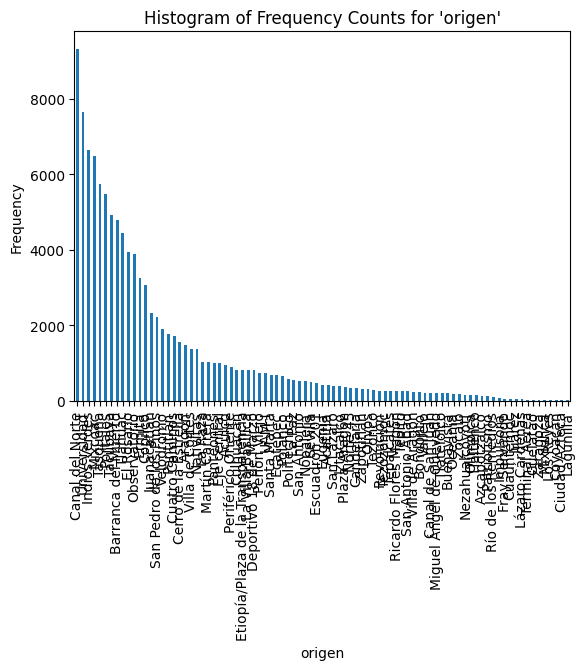

In [21]:
frequency_counts = datos_estaciones["metro_origen"].value_counts()

# Plot histogram of frequencies with category names on the x-axis
frequency_counts.plot(kind='bar', title="Histogram of Frequency Counts for 'origen'", xlabel="origen", ylabel="Frequency")
plt.show()

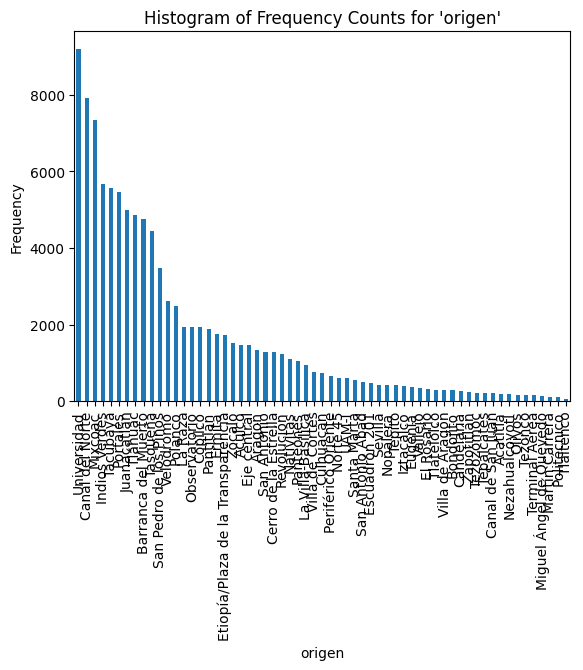

In [22]:
frequency_counts = datos_estaciones["metro_destino"].value_counts()

# Plot histogram of frequencies with category names on the x-axis
frequency_counts.plot(kind='bar', title="Histogram of Frequency Counts for 'origen'", xlabel="origen", ylabel="Frequency")
plt.show()

In [23]:
matriz_origen_destino = pd.crosstab(datos_estaciones['metro_origen'], datos_estaciones['metro_destino'])

# Si deseas añadir los totales por fila y columna, puedes hacer lo siguiente:
matriz_origen_destino['Total por origen'] = matriz_origen_destino.sum(axis=1)
matriz_origen_destino.loc['Total por destino'] = matriz_origen_destino.sum()

# Visualizar la matriz
matriz_origen_destino

metro_destino,Acatitla,Aculco,Aragón,Barranca del Muerto,Bondojito,Canal de San Juan,Canal del Norte,Candelaria,Cerro de la Estrella,Copilco,...,Tláhuac,UAM-I,Universidad,Vallejo,Velódromo,Villa de Aragón,Villa de Cortés,Zapotitlán,Zócalo,Total por origen
metro_origen,,,,,,,,,,,,,,,,,,,,,
Acatitla,0,34,0,4,0,1,0,0,0,4,...,34,15,4,1,15,1,0,0,5,344
Aculco,2,144,8,24,4,2,32,1,1,5,...,32,10,23,0,31,0,4,3,21,931
Aragón,9,12,346,34,32,2,48,4,0,2,...,29,1,86,7,25,42,0,0,28,1416
Azcapotzalco,0,4,0,0,3,0,0,0,0,2,...,3,0,2,6,15,0,4,0,4,122
Barranca del Muerto,6,29,4,674,7,2,156,49,48,114,...,181,3,720,19,68,0,0,2,65,4719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villa de Aragón,0,0,8,3,8,0,8,1,2,0,...,2,0,16,1,2,17,0,0,12,229
Villa de Cortés,0,44,8,22,0,0,0,4,0,22,...,44,10,48,0,128,0,160,0,2,1346
Zapotitlán,1,9,0,2,0,1,40,4,0,1,...,11,16,9,0,1,1,8,5,7,263


In [24]:


matrix = pd.pivot_table(proporciones, values='pi', columns=['p', 'q'], index=['l', 'i', 'j'], aggfunc='sum')

# Fill NaN values with 0
matrix = matrix.fillna(0)



In [25]:
matrix

p                                               Acatitla                    \
q                                                 Aculco Agrícola Oriental   
l i                      j                                                   
1 Balbuena               Boulevard Puerto Aéreo      0.0               0.0   
                         Moctezuma                   0.0               0.0   
  Balderas               Cuauhtémoc                  0.0               0.0   
                         Salto del Agua              0.0               0.0   
  Boulevard Puerto Aéreo Balbuena                    0.0               0.0   
...                                                  ...               ...   
B San Lázaro             Ricardo Flores Magón        0.0               0.0   
  Tepito                 Lagunilla                   0.0               0.0   
                         Morelos                     0.0               0.0   
  Villa de Aragón        Bosque de Aragón            0.0               0.0   
                         Nezahualcóyotl              0.0               0.0   

p                                                                 \
q                                               Allende Apatlaco   
l i                      j                                         
1 Balbuena               Boulevard Puerto Aéreo    0.00      0.0   
                         Moctezuma                 0.55      0.0   
  Balderas               Cuauhtémoc                0.00      0.0   
                         Salto del Agua            0.00      0.0   
  Boulevard Puerto Aéreo Balbuena                  0.55      0.0   
...                                                 ...      ...   
B San Lázaro             Ricardo Flores Magón      0.00      0.0   
  Tepito                 Lagunilla                 0.00      0.0   
                         Morelos                   0.00      0.0   
  Villa de Aragón        Bosque de Aragón          0.00      0.0   
                         Nezahualcóyotl            0.00      0.0   

p                                                                      \
q                                               Aquiles Serdán Aragón   
l i                      j                                              
1 Balbuena               Boulevard Puerto Aéreo            0.0    0.0   
                         Moctezuma                         0.0    0.0   
  Balderas               Cuauhtémoc                        0.0    0.0   
                         Salto del Agua                    0.0    0.0   
  Boulevard Puerto Aéreo Balbuena                          0.0    0.0   
...                                                        ...    ...   
B San Lázaro             Ricardo Flores Magón              0.0    0.0   
  Tepito                 Lagunilla                         0.0    0.0   
                         Morelos                           0.0    0.0   
  Villa de Aragón        Bosque de Aragón                  0.0    0.0   
                         Nezahualcóyotl                    0.0    0.0   

p                                                                    \
q                                               Atlalilco Auditorio   
l i                      j                                            
1 Balbuena               Boulevard Puerto Aéreo       0.0       0.0   
                         Moctezuma                    0.0       0.0   
  Balderas               Cuauhtémoc                   0.0       0.0   
                         Salto del Agua               0.0       0.0   
  Boulevard Puerto Aéreo Balbuena                     0.0       0.0   
...                                                   ...       ...   
B San Lázaro             Ricardo Flores Magón         0.0       0.0   
  Tepito                 Lagunilla                    0.0       0.0   
                         Morelos                      0.0       0.0   
  Villa de Aragón        Bosque de Aragón             0.0       0.0   
        

In [26]:
for a in diccionario["Nuevo"]:
    if a not in matriz_origen_destino.columns:
        matriz_origen_destino[a] = None  # Agrega la columna con valores nulos si no existe


C:\Users\juanp\AppData\Local\Temp\ipykernel_4596\1564516861.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matriz_origen_destino[a] = None  # Agrega la columna con valores nulos si no existe
C:\Users\juanp\AppData\Local\Temp\ipykernel_4596\1564516861.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matriz_origen_destino[a] = None  # Agrega la columna con valores nulos si no existe
C:\Users\juanp\AppData\Local\Temp\ipykernel_4596\1564516861.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

In [27]:
for a in diccionario["Nuevo"]:
    if a not in matriz_origen_destino.index:
        matriz_origen_destino.loc[a] = None  # Agrega una nueva fila con el índice 'a' y valores nulos


In [28]:
matriz_origen_destino.fillna(0, inplace=True)
matriz_origen_destino

metro_destino,Acatitla,Aculco,Aragón,Barranca del Muerto,Bondojito,Canal de San Juan,Canal del Norte,Candelaria,Cerro de la Estrella,Copilco,...,San Lázaro,Santa Anita,Tacuba,Talismán,Valle Gómez,Viaducto,Viveros/Derechos Humanos,Xola,Zapata,Zaragoza
metro_origen,,,,,,,,,,,,,,,,,,,,,
Acatitla,0.0,34.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,4.0,...,0,0,0,0,0,0,0,0,0,0
Aculco,2.0,144.0,8.0,24.0,4.0,2.0,32.0,1.0,1.0,5.0,...,0,0,0,0,0,0,0,0,0,0
Aragón,9.0,12.0,346.0,34.0,32.0,2.0,48.0,4.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
Azcapotzalco,0.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
Barranca del Muerto,6.0,29.0,4.0,674.0,7.0,2.0,156.0,49.0,48.0,114.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viaducto,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
Viveros/Derechos Humanos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
Xola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Obtener el orden deseado de los índices y columnas a partir de diccionario["nuevo"]
orden_filas = diccionario["Nuevo"]
orden_columnas = diccionario["Nuevo"]

# Reordenar la matriz matriz_origen_destino según este orden
matriz_origen_destino = matriz_origen_destino.reindex(index=orden_filas, columns=orden_columnas)


In [30]:
matriz_origen_destino

Nuevo,Acatitla,Aculco,Agrícola Oriental,Allende,Apatlaco,Aquiles Serdán,Aragón,Atlalilco,Auditorio,Autobuses del Norte,...,Velódromo,Viaducto,Villa de Aragón,Villa de Cortés,Viveros/Derechos Humanos,Xola,Zapata,Zapotitlán,Zaragoza,Zócalo
Nuevo,,,,,,,,,,,,,,,,,,,,,
Acatitla,0.0,34.0,0,0,0,0,0.0,0,0,0,...,15.0,0,1.0,0.0,0,0,0,0.0,0,5.0
Aculco,2.0,144.0,0,0,0,0,8.0,0,0,0,...,31.0,0,0.0,4.0,0,0,0,3.0,0,21.0
Agrícola Oriental,0.0,0.0,0,0,0,0,0.0,0,0,0,...,0.0,0,0.0,0.0,0,0,0,0.0,0,0.0
Allende,0.0,0.0,0,0,0,0,0.0,0,0,0,...,0.0,0,0.0,0.0,0,0,0,0.0,0,0.0
Apatlaco,0.0,0.0,0,0,0,0,0.0,0,0,0,...,0.0,0,0.0,0.0,0,0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xola,0.0,0.0,0,0,0,0,0.0,0,0,0,...,0.0,0,0.0,0.0,0,0,0,0.0,0,0.0
Zapata,0.0,0.0,0,0,0,0,0.0,0,0,0,...,0.0,0,0.0,0.0,0,0,0,0.0,0,0.0
Zapotitlán,1.0,9.0,0,0,0,0,0.0,0,0,0,...,1.0,0,1.0,8.0,0,0,0,5.0,0,7.0


In [31]:
vector = matriz_origen_destino.values.ravel()

# Verificar la forma del vector resultante
print("Forma del vector resultante:", vector.shape)

# Si deseas convertir el vector en un DataFrame de una columna
vector_dataframe = pd.DataFrame(vector)

# Verificar la forma del DataFrame de una columna
print("Forma del DataFrame de una columna:", vector_dataframe.shape)

Forma del vector resultante: (26569,)
Forma del DataFrame de una columna: (26569, 1)


In [32]:
vector_dataframe

,0
0,0.0
1,34.0
2,0.0
3,0.0
4,0.0
...,...
26564,0.0
26565,0.0
26566,0.0
26567,0.0


In [33]:
filas, columnas = matriz_origen_destino.shape
matriz_sin_diagonal = matriz_origen_destino.copy()
for i in range(min(filas, columnas)):
    matriz_sin_diagonal.iloc[i, i] = np.nan
vector = matriz_sin_diagonal.values.ravel()
vector_sin_diagonal = vector[~np.isnan(vector)]
vector_dataframe = pd.DataFrame(vector_sin_diagonal)
print("Forma del DataFrame de una columna sin diagonal:", vector_dataframe.shape)


Forma del DataFrame de una columna sin diagonal: (26406, 1)


In [34]:

matrix_array = matrix.to_numpy()
vector_array = vector_dataframe.to_numpy()
matrix_array
vector_array

array([[34.],
       [ 0.],
       [ 0.],
       ...,
       [ 0.],
       [ 0.],
       [ 0.]])

In [35]:
vector_array_reshaped = vector_array.reshape(-1, 1)
result_array = np.dot(matrix_array, vector_array_reshaped)
result_dataframe = pd.DataFrame(result_array, columns=['Result'])
print(result_dataframe)

      Result
0     356.00
1     682.19
2    4715.12
3    1928.24
4     682.19
..       ...
359   418.42
360   840.71
361   554.00
362  1079.00
363   323.00

[364 rows x 1 columns]


In [36]:
# Definimos algunas matrices de prueba
n = 3  # Dimensión de las matrices G y g
q = 4  # Dimensión no cuadrada de Pa
k = 0.5  # Parámetro de regularización

# Matrices dummy
# Definir dimensiones
n = 3  # Dimensión de las matrices G y g
q = 4  # Dimensión no cuadrada de Pa

# Matrices predefinidas
g = np.array([[0.1, 0.2, 0.3],
              [0.4, 0.5, 0.6],
              [0.7, 0.8, 0.9]])

G = np.array([[0.9, 0.8, 0.7],
              [0.6, 0.5, 0.4],
              [0.3, 0.2, 0.1]])

Pa = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
               [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],
               [0.2, 0.3, 0.5, 0.7, 0.11, 0.13, 0.17, 0.19, 0.23],
               [0.3, 0.1, 0.4, 0.1, 0.6, 0.9, 0.2, 0.8, 0.7]])


# Deformación de G, por ejemplo, una rotación simple
theta = np.pi / 4  # 45 grados de rotación
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],
                            [np.sin(theta),  np.cos(theta), 0],
                            [0,              0,             1]])
G_prime = G @ rotation_matrix

# Función para calcular va y va_prime
def compute_va(g, G_prime, Pa, n, q):
    g_flat = g.flatten()  # Aplanamos g para poder multiplicar por Pa
    G_prime_flat = G_prime.flatten()  # Lo mismo para G_prime
    va = Pa @ g_flat
    va_prime = Pa @ G_prime_flat
    return va, va_prime  # Mantenemos va y va_prime como vectores

# Calcular va y va_prime
va, va_prime = compute_va(g, G_prime, Pa, n, q)

# Función objetivo
def objective_function(g, G, va, va_prime, k):
    term1 = np.sum((g - G)**2)
    term2 = k * np.sum((va - va_prime)**2)
    return 0.5 * (term1 + term2)

# Calcular el valor de la función objetivo
objective_value = objective_function(g, G, va, va_prime, k)
print("Input: \n", g, "\n")
print("Valor de la función objetivo:", objective_value)


Input: 
 [[0.1 0.2 0.3]
 [0.4 0.5 0.6]
 [0.7 0.8 0.9]] 

Valor de la función objetivo: 2.488909226165795


In [37]:
def compute_gradient(g, G, va, va_prime, Pa, k):
    """
    Calcula el gradiente de la función objetivo con respecto a la matriz g.
    
    Args:
    g (numpy.ndarray): Matriz variable de nxn.
    G (numpy.ndarray): Matriz dada de nxn.
    va (numpy.ndarray): Vector resultado de Pa*g.
    va_prime (numpy.ndarray): Vector resultado de Pa*G'.
    Pa (numpy.ndarray): Matriz de q x n^2.
    k (float): Parámetro de regularización.

    Returns:
    numpy.ndarray: Gradiente de la función objetivo.
    """
    # Derivada del primer término: directamente la diferencia entre g y G
    grad_term1 = g - G
    
    # Derivada del segundo término
    # Error entre va y va_prime
    error = va - va_prime
    # Va contribución al gradiente: Pa^T multiplicado por el error
    grad_term2_contrib = Pa.T @ error
    # Reshape y escala por el factor de regularización k
    grad_term2 = k * grad_term2_contrib.reshape(g.shape)

    # Gradiente total
    gradient = grad_term1 + grad_term2
    
    return gradient

# Supongamos que ya tenemos g, G, Pa, va, va_prime definidos como antes
# Supongamos también que k y las matrices están correctamente definidas

# Cálculo de va y va_prime
va, va_prime = compute_va(g, G_prime, Pa, n, q)

# Cálculo del gradiente
gradient = compute_gradient(g, G, va, va_prime, Pa, k)
print("Jacobiano de la función objetivo:\n", gradient)


Jacobiano de la función objetivo:
 [[-0.77310581 -0.59833866 -0.09216254]
 [ 0.00992883  0.69289351  1.20866059]
 [ 1.04988744  1.76769688  2.01300847]]


In [38]:
def grad_conjugado(g, G, Pa, G_prime, k, tol, max_iter=1000):
    """
    Implementa el método del gradiente conjugado para minimizar una función objetivo
    basada en matrices y una operación de diferenciación particular.

    Args:
    g (numpy.ndarray): Matriz inicial nxn, punto de partida para la optimización.
    G (numpy.ndarray): Matriz dada nxn, representa una constante en la función objetivo.
    Pa (numpy.ndarray): Matriz q x n^2, utilizada para calcular los productos implicados en la función objetivo.
    G_prime (numpy.ndarray): Matriz G deformada, utilizada en el cálculo de va_prime.
    k (float): Coeficiente de regularización que equilibra los términos de la función objetivo.
    tol (float): Tolerancia para el criterio de convergencia, determina cuándo se considera que el método ha convergido.
    max_iter (int): Número máximo de iteraciones para evitar ciclos infinitos en casos de no convergencia.

    Returns:
    tuple:
        numpy.ndarray: La solución aproximada, que minimiza la función objetivo.
        int: Número de iteraciones realizadas antes de la convergencia.
    """

    # Calcular va y va_prime utilizando la función compute_va
    va, va_prime = compute_va(g, G_prime, Pa, n, q)

    # Calcular el gradiente inicial basado en g y otros parámetros
    r = compute_gradient(g, G, va, va_prime, Pa, k)
    p = -r  # Dirección inicial de búsqueda
    rTr = np.sum(r * r)  # Producto punto del gradiente inicial consigo mismo
    x = g  # Inicialización de la solución

    # Bucle de iteración principal del método del gradiente conjugado
    for j in range(max_iter):
        # Calcular Ap, donde p es la dirección actual de búsqueda
        Ap = compute_gradient(p, np.zeros_like(G), Pa @ p.flatten(), np.zeros_like(va_prime), Pa, k).reshape(p.shape)
        alpha = rTr / np.sum(p * Ap)  # Tamaño de paso óptimo

        x = x + alpha * p  # Actualización de la solución
        r_new = r + alpha * Ap  # Actualización del gradiente
        
        if np.linalg.norm(r_new) < tol:  # Criterio de convergencia
            break

        # Actualización de la dirección de búsqueda p
        beta = np.sum(r_new * r_new) / rTr
        p = -r_new + beta * p
        r, rTr = r_new, np.sum(r_new * r_new)  # Actualizar r y rTr para la próxima iteración

    return x, j + 1  # Retorna la solución y el número de iteraciones realizadas


# Solución con datos dummy
solution, iterations = grad_conjugado(g, G, Pa, G_prime, k, 1e-14)
print("Solución encontrada:\n", solution)
print("Iteraciones realizadas:", iterations)



Solución encontrada:
 [[0.79092771 0.70882331 0.60237297]
 [0.52798231 0.39211876 0.28140159]
 [0.22459131 0.0978443  0.00897434]]
Iteraciones realizadas: 4
